# **Notebook**

## Import, view, and merge data

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import random
np.random.seed(14)

In [2]:
df_1 = pd.read_csv('NBA_season1718_salary.csv')
df_2 = pd.read_csv('Players.csv')
df_3 = pd.read_csv('Seasons_Stats.csv')

In [3]:
print(df_1.shape)
df_1.head()

(573, 4)


,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [4]:
df_1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
print(df_2.shape)
df_2.head()

(3922, 8)


,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [6]:
df_2.collage.value_counts()[0:30]

University of Kentucky                        89
University of California, Los Angeles         86
University of North Carolina                  67
University of Kansas                          59
Duke University                               56
University of Notre Dame                      51
Syracuse University                           49
Indiana University                            49
St. John's University                         48
University of Louisville                      46
Michigan State University                     45
University of Arizona                         43
University of Minnesota                       41
Ohio State University                         39
University of Michigan                        38
Villanova University                          36
University of Maryland                        36
North Carolina State University               35
Georgia Institute of Technology               35
University of Illinois at Urbana-Champaign    35
University of Nevada

In [7]:
df_2.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
print(df_3.shape)
df_3.head()

(24691, 53)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [9]:
df_3.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df_4 = pd.merge(df_1,df_2,how='inner',on='Player')

In [11]:
df_4.rename(columns={'collage':'college'},inplace=True)
df_4.rename(columns={'season17_18':'salary'},inplace=True)

In [12]:
print(df_4.shape)
df_4.head()

(478, 9)


,Player,Tm,salary,height,weight,college,born,birth_city,birth_state
0,Stephen Curry,GSW,34682550.0,190.0,86.0,Davidson College,1988.0,Akron,Ohio
1,LeBron James,CLE,33285709.0,203.0,113.0,NaN,1984.0,Akron,Ohio
2,Paul Millsap,DEN,31269231.0,203.0,111.0,Louisiana Tech University,1985.0,Monroe,Louisiana
3,Gordon Hayward,BOS,29727900.0,203.0,102.0,Butler University,1990.0,Indianapolis,Indiana
4,Blake Griffin,DET,29512900.0,208.0,113.0,University of Oklahoma,1989.0,Oklahoma City,Oklahoma


In [13]:
df_4.height[0]

190.0

In [14]:
df_4['BMI'] = round(df_4.weight/((0.1*df_4.height)**2),3)*100

In [15]:
print(df_4.shape)
df_4.head()

(478, 10)


,Player,Tm,salary,height,weight,college,born,birth_city,birth_state,BMI
0,Stephen Curry,GSW,34682550.0,190.0,86.0,Davidson College,1988.0,Akron,Ohio,23.8
1,LeBron James,CLE,33285709.0,203.0,113.0,NaN,1984.0,Akron,Ohio,27.4
2,Paul Millsap,DEN,31269231.0,203.0,111.0,Louisiana Tech University,1985.0,Monroe,Louisiana,26.9
3,Gordon Hayward,BOS,29727900.0,203.0,102.0,Butler University,1990.0,Indianapolis,Indiana,24.8
4,Blake Griffin,DET,29512900.0,208.0,113.0,University of Oklahoma,1989.0,Oklahoma City,Oklahoma,26.1


In [16]:
df_4.Tm.unique()

array(['GSW', 'CLE', 'DEN', 'BOS', 'DET', 'TOR', 'OKC', 'MEM', 'HOU',
       'POR', 'NOP', 'MIA', 'WAS', 'CHO', 'DAL', 'PHI', 'LAL', 'LAC',
       'MIL', 'UTA', 'SAS', 'IND', 'NYK', 'BRK', 'MIN', 'PHO', 'ORL',
       'ATL', 'CHI', 'SAC'], dtype=object)

In [17]:
df_4.head()

,Player,Tm,salary,height,weight,college,born,birth_city,birth_state,BMI
0,Stephen Curry,GSW,34682550.0,190.0,86.0,Davidson College,1988.0,Akron,Ohio,23.8
1,LeBron James,CLE,33285709.0,203.0,113.0,NaN,1984.0,Akron,Ohio,27.4
2,Paul Millsap,DEN,31269231.0,203.0,111.0,Louisiana Tech University,1985.0,Monroe,Louisiana,26.9
3,Gordon Hayward,BOS,29727900.0,203.0,102.0,Butler University,1990.0,Indianapolis,Indiana,24.8
4,Blake Griffin,DET,29512900.0,208.0,113.0,University of Oklahoma,1989.0,Oklahoma City,Oklahoma,26.1


In [18]:
print(df_3.shape)
df_3.head()

(24691, 52)


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [19]:
df_5 = pd.merge(df_3,df_4,how='inner',on='Player')

In [20]:
df_5 = df_5[df_5.Year==2017]

In [21]:
print(df_5.shape)
df_5.head()

(552, 61)


,Year,Player,Pos,Age,Tm_x,G,GS,MP,PER,TS%,...,PTS,Tm_y,salary,height,weight,college,born,birth_city,birth_state,BMI
29,2017.0,Mike Dunleavy,SF,36.0,TOT,53.0,2.0,841.0,10.1,0.573,...,275.0,ATL,1662500.0,190.0,81.0,University of South Carolina,1954.0,Brooklyn,New York,22.4
30,2017.0,Mike Dunleavy,SF,36.0,CLE,23.0,2.0,366.0,7.6,0.539,...,106.0,ATL,1662500.0,190.0,81.0,University of South Carolina,1954.0,Brooklyn,New York,22.4
31,2017.0,Mike Dunleavy,SF,36.0,ATL,30.0,0.0,475.0,11.9,0.597,...,169.0,ATL,1662500.0,190.0,81.0,University of South Carolina,1954.0,Brooklyn,New York,22.4
60,2017.0,Gerald Henderson,SG,29.0,PHI,72.0,41.0,1667.0,10.8,0.529,...,662.0,PHI,1000000.0,188.0,79.0,Virginia Commonwealth University,1956.0,Richmond,Virginia,22.4
88,2017.0,Larry Nance,PF,24.0,LAL,63.0,7.0,1442.0,15.8,0.567,...,449.0,CLE,1471382.0,208.0,92.0,Clemson University,1959.0,Anderson,South Carolina,21.3


In [22]:
df_5.drop_duplicates(subset='Player').shape

(411, 61)

In [23]:
df_5 = df_5.drop_duplicates(subset='Player')

In [24]:
df_5.shape

(411, 61)

In [25]:
df_5.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Tm_y', 'salary', 'height', 'weight',
       'college', 'born', 'birth_city', 'birth_state', 'BMI'],
      dtype='object')

## Hypothesis testing

In [26]:
# Question 1: do shorter players shoot better from 3?

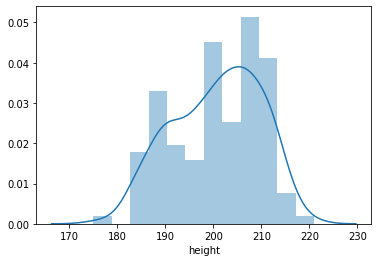

In [27]:
sns.distplot(df_5.height)

In [28]:
df_5['3P%'].fillna(df_5['3P%'].mean(),inplace=True)

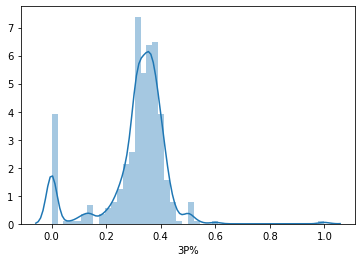

In [29]:
sns.distplot(df_5['3P%'])

In [30]:
h_3p_df = df_5[['height','3P%']].groupby('height',as_index=False)

In [31]:
print(h_3p_df.mean().shape)
h_3p_df.mean().head(2)

(18, 2)


,height,3P%
0,175.0,0.318
1,178.0,0.295


In [32]:
print(h_3p_df.count().shape)
h_3p_df.count().head(2)

(18, 2)


,height,3P%
0,175.0,1
1,178.0,2


In [33]:
print(h_3p_df.std().shape)
h_3p_df.std().head(2)

(18, 2)


,height,3P%
0,13.228757,NaN
1,13.341664,0.041012


In [34]:
h_3p_df.count().iloc[:,1][8:18].sum()

272

In [35]:
h_3p_df.count().iloc[:,1][0:8].sum()

139

In [36]:
np.mean(h_3p_df.mean()[0:8])

height    186.000000
3P%         0.340583
dtype: float64

In [37]:
np.std(h_3p_df.mean()[0:8])

height    6.745369
3P%       0.029122
dtype: float64

In [38]:
np.mean(h_3p_df.mean()[8:18])

height    209.500000
3P%         0.260908
dtype: float64

In [39]:
np.std(h_3p_df.mean()[8:18])

height    7.228416
3P%       0.098426
dtype: float64

In [40]:
rvs_short = stats.norm.rvs(loc=0.340583,scale=0.029122,size=100)
rvs_tall = stats.norm.rvs(loc=0.260908,scale=0.098426,size=100)

In [41]:
stats.ttest_ind(rvs_short,rvs_tall)

Ttest_indResult(statistic=9.151081999278103, pvalue=7.014885010874852e-17)

#### Conclusion: the p-value is quite low. This implies we reject the null hypothesis that bigger players are likely to shoot as well as shorter players

In [42]:
# Question 2: Do shooting guards shoot better than point guards from 2?

In [43]:
q2_df = df_5[['Pos','2P%']].groupby('Pos',as_index=True)

In [44]:
q2_df.std()

,2P%
Pos,
C,0.082875
PF,0.067343
PF-C,NaN
PG,0.105770
SF,0.072076
SG,0.067006


In [45]:
q2_df.mean()

,2P%
Pos,
C,0.538558
PF,0.497307
PF-C,0.483000
PG,0.456337
SF,0.502850
SG,0.464105


In [46]:
q2_df.count()

,2P%
Pos,
C,86
PF,75
PF-C,1
PG,83
SF,80
SG,86


In [47]:
rvs_pg = stats.norm.rvs(loc=0.456337,scale=0.105770,size=80)
rvs_sg = stats.norm.rvs(loc=0.464105,scale=0.067006,size=80)

In [48]:
stats.ttest_ind(rvs_pg,rvs_sg)

Ttest_indResult(statistic=-1.5708608104394013, pvalue=0.11821542667096897)

In [49]:
# what about powar forward and center?
rvs_pf = stats.norm.rvs(loc=0.497307,scale=0.067343,size=80)
rvs_c = stats.norm.rvs(loc=0.538558,scale=0.082875,size=80)

In [50]:
stats.ttest_ind(rvs_pf,rvs_c)

Ttest_indResult(statistic=-2.5008165049252384, pvalue=0.013410295619056253)

In [51]:
# Question 3: do certain players tend to get more minutes per season?
q3_df = df_5[['Pos','MP']].groupby('Pos',as_index=True)

In [52]:
q3_df.mean()

,MP
Pos,
C,1245.139535
PF,1266.600000
PF-C,980.000000
PG,1350.180723
SF,1539.325000
SG,1508.267442


In [53]:
q3_df.std()

,MP
Pos,
C,793.405825
PF,800.848115
PF-C,NaN
PG,859.103534
SF,784.587802
SG,740.637300


In [54]:
q3_df.count()

,MP
Pos,
C,86
PF,75
PF-C,1
PG,83
SF,80
SG,86


In [55]:
# Let's look at the largest absolute disparity in standard deviation: PG vs SG
# We'll look at more minute disparities next

In [56]:
rvs_pg_min = stats.norm.rvs(loc=1350.180723,scale=859.103534,size=80)
rvs_sg_min = stats.norm.rvs(loc=1508.267442,scale=740.6373,size=80)

In [57]:
stats.ttest_ind(rvs_pg_min,rvs_sg_min)

Ttest_indResult(statistic=-1.147495612110307, pvalue=0.25291140198975365)

In [58]:
# result - we can't disprove null hypothesis unless we expand the sample size probably

In [59]:
rvs_sf_min = stats.norm.rvs(loc=1539.325000,scale=784.587802,size=80)
rvs_c_min = stats.norm.rvs(loc=1245.139535,scale=793.405825,size=80)

In [60]:
stats.ttest_ind(rvs_c_min,rvs_sf_min)

Ttest_indResult(statistic=-1.0530664493118977, pvalue=0.2939183275742529)

In [61]:
# We can say with 95% certainty that the fact small forwards play more than centers is not due to randomness

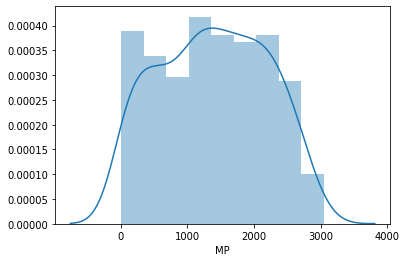

In [62]:
# next a quick look at the distribution of minutes played by player
sns.distplot(df_5.MP)

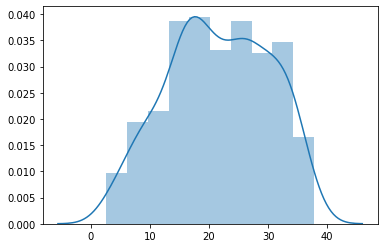

In [63]:
# what about minutes per game?
sns.distplot(df_5.MP/df_5.G)

In [64]:
# Finally, if we were to scale - are minutes per game strongly related to minutes per season?

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [66]:
print(np.min(df_5.MP/df_5.G))
print(np.mean(df_5.MP/df_5.G))
print(np.max(df_5.MP/df_5.G))
print(np.std(df_5.MP/df_5.G))

2.6
21.587417638680712
37.75675675675676
8.573482526487794


In [67]:
print(np.min(df_5.MP))
print(np.mean(df_5.MP))
print(np.max(df_5.MP))
print(np.std(df_5.MP))

9.0
1381.9440389294405
3048.0
799.8654992057708


In [68]:
(21.587417638680712-2.6)/(37.75675675675676-2.6)

0.5400787612478369

In [69]:
(8.573482526487794-2.6)/(37.75675675675676-2.6)

0.16990994271221432

In [70]:
(1381.9440389294405-9)/(3048.0-9)

0.45177493877243846

In [71]:
(799.8654992057708-9)/(3048.0-9)

0.2602387295839983

In [72]:
len(df_5)

411

In [73]:
rvs_mpg = stats.norm.rvs(loc=0.5400787612478369,scale=0.16990994271221432,size=350)
rvs_mpr = stats.norm.rvs(loc=0.45177493877243846,scale=0.2602387295839983,size=350)

In [74]:
stats.ttest_ind(rvs_mpg,rvs_mpr)

Ttest_indResult(statistic=5.828040022335097, pvalue=8.567530933237103e-09)

## Feature engineering

### Custom features, drop old, and fill null

In [75]:
df_5['Start%'] = df_5.GS/df_5.G
df_5['ppg'] = df_5.PTS/df_5.G
df_5['apg'] = df_5.AST/df_5.G
df_5['tpg'] = df_5.TOV/df_5.G
df_5['fpg'] = df_5.PF/df_5.G
df_5['bpg'] = df_5.BLK/df_5.G
df_5['spg'] = df_5.STL/df_5.G
df_5['rpg'] = df_5.TRB/df_5.G
df_5['orpg'] = df_5.ORB/df_5.G
df_5['mpg'] = df_5.MP/df_5.G

In [76]:
df_5.drop(['PTS','AST','TOV','BLK','STL','TRB'],axis=1,inplace=True)

In [77]:
df_5.head()

,Year,Player,Pos,Age,Tm_x,G,GS,MP,PER,TS%,...,Start%,ppg,apg,tpg,fpg,bpg,spg,rpg,orpg,mpg
29,2017.0,Mike Dunleavy,SF,36.0,TOT,53.0,2.0,841.0,10.1,0.573,...,0.037736,5.188679,0.943396,0.528302,1.264151,0.132075,0.283019,2.169811,0.339623,15.867925
60,2017.0,Gerald Henderson,SG,29.0,PHI,72.0,41.0,1667.0,10.8,0.529,...,0.569444,9.194444,1.555556,0.861111,1.791667,0.208333,0.569444,2.569444,0.472222,23.152778
88,2017.0,Larry Nance,PF,24.0,LAL,63.0,7.0,1442.0,15.8,0.567,...,0.111111,7.126984,1.523810,0.888889,2.365079,0.634921,1.301587,5.857143,1.904762,22.888889
112,2017.0,Tim Hardaway,SG,24.0,ATL,79.0,30.0,2154.0,15.2,0.568,...,0.379747,14.468354,2.303797,1.341772,1.303797,0.189873,0.696203,2.835443,0.443038,27.265823
128,2017.0,Glenn Robinson,SF,23.0,IND,69.0,27.0,1426.0,11.5,0.564,...,0.391304,6.072464,0.681159,0.536232,0.913043,0.289855,0.594203,3.550725,0.826087,20.666667


In [78]:
df_5.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'PF', 'Tm_y', 'salary',
       'height', 'weight', 'college', 'born', 'birth_city', 'birth_state',
       'BMI', 'Start%', 'ppg', 'apg', 'tpg', 'fpg', 'bpg', 'spg', 'rpg',
       'orpg', 'mpg'],
      dtype='object')

In [79]:
df_5.drop('Year',axis=1,inplace=True)

In [80]:
df_5.drop(['3P', '3PA','2P','2PA','blanl','blank2','FG','FGA','FT','FTA'],axis=1,inplace=True)

In [81]:
df_5.columns

Index(['Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG%',
       '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'PF', 'Tm_y', 'salary',
       'height', 'weight', 'college', 'born', 'birth_city', 'birth_state',
       'BMI', 'Start%', 'ppg', 'apg', 'tpg', 'fpg', 'bpg', 'spg', 'rpg',
       'orpg', 'mpg'],
      dtype='object')

In [82]:
df_5.college.fillna('N/A',inplace=True)

In [83]:
df_5.isna().sum()

Player          0
Pos             0
Age             0
Tm_x            0
G               0
GS              0
MP              0
PER             0
TS%             0
3PAr            0
FTr             0
ORB%            0
DRB%            0
TRB%            0
AST%            0
STL%            0
BLK%            0
TOV%            0
USG%            0
OWS             0
DWS             0
WS              0
WS/48           0
OBPM            0
DBPM            0
BPM             0
VORP            0
FG%             0
3P%             0
2P%             0
eFG%            0
FT%             4
ORB             0
DRB             0
PF              0
Tm_y            0
salary          0
height          0
weight          0
college         0
born            0
birth_city     21
birth_state    22
BMI             0
Start%          0
ppg             0
apg             0
tpg             0
fpg             0
bpg             0
spg             0
rpg             0
orpg            0
mpg             0
dtype: int64

In [84]:
df_5['3P%'].fillna(df_5['3P%'].mean(),inplace=True)

In [85]:
df_5.birth_city.fillna('Los Angeles',inplace=True)
df_5.birth_state.fillna('California',inplace=True)

In [86]:
df_5['FT%'].fillna(df_5['FT%'].mean(),inplace=True)

In [87]:
df_5.isna().sum().sum()

0

In [88]:
df_5.columns

Index(['Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG%',
       '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'PF', 'Tm_y', 'salary',
       'height', 'weight', 'college', 'born', 'birth_city', 'birth_state',
       'BMI', 'Start%', 'ppg', 'apg', 'tpg', 'fpg', 'bpg', 'spg', 'rpg',
       'orpg', 'mpg'],
      dtype='object')

In [89]:
df_5 = df_5.reset_index()

In [90]:
df_5.head()

,index,Player,Pos,Age,Tm_x,G,GS,MP,PER,TS%,...,Start%,ppg,apg,tpg,fpg,bpg,spg,rpg,orpg,mpg
0,29,Mike Dunleavy,SF,36.0,TOT,53.0,2.0,841.0,10.1,0.573,...,0.037736,5.188679,0.943396,0.528302,1.264151,0.132075,0.283019,2.169811,0.339623,15.867925
1,60,Gerald Henderson,SG,29.0,PHI,72.0,41.0,1667.0,10.8,0.529,...,0.569444,9.194444,1.555556,0.861111,1.791667,0.208333,0.569444,2.569444,0.472222,23.152778
2,88,Larry Nance,PF,24.0,LAL,63.0,7.0,1442.0,15.8,0.567,...,0.111111,7.126984,1.523810,0.888889,2.365079,0.634921,1.301587,5.857143,1.904762,22.888889
3,112,Tim Hardaway,SG,24.0,ATL,79.0,30.0,2154.0,15.2,0.568,...,0.379747,14.468354,2.303797,1.341772,1.303797,0.189873,0.696203,2.835443,0.443038,27.265823
4,128,Glenn Robinson,SF,23.0,IND,69.0,27.0,1426.0,11.5,0.564,...,0.391304,6.072464,0.681159,0.536232,0.913043,0.289855,0.594203,3.550725,0.826087,20.666667


In [91]:
df_5 = df_5.reset_index()

In [92]:
df_5.head()

,level_0,index,Player,Pos,Age,Tm_x,G,GS,MP,PER,...,Start%,ppg,apg,tpg,fpg,bpg,spg,rpg,orpg,mpg
0,0,29,Mike Dunleavy,SF,36.0,TOT,53.0,2.0,841.0,10.1,...,0.037736,5.188679,0.943396,0.528302,1.264151,0.132075,0.283019,2.169811,0.339623,15.867925
1,1,60,Gerald Henderson,SG,29.0,PHI,72.0,41.0,1667.0,10.8,...,0.569444,9.194444,1.555556,0.861111,1.791667,0.208333,0.569444,2.569444,0.472222,23.152778
2,2,88,Larry Nance,PF,24.0,LAL,63.0,7.0,1442.0,15.8,...,0.111111,7.126984,1.523810,0.888889,2.365079,0.634921,1.301587,5.857143,1.904762,22.888889
3,3,112,Tim Hardaway,SG,24.0,ATL,79.0,30.0,2154.0,15.2,...,0.379747,14.468354,2.303797,1.341772,1.303797,0.189873,0.696203,2.835443,0.443038,27.265823
4,4,128,Glenn Robinson,SF,23.0,IND,69.0,27.0,1426.0,11.5,...,0.391304,6.072464,0.681159,0.536232,0.913043,0.289855,0.594203,3.550725,0.826087,20.666667


In [93]:
df_5.drop('level_0',axis=1,inplace=True)

In [94]:
conf_dict = {'GSW':'W','DEN':'W','OKC':'W','MEM':'W','HOU':'W','POR':'W','NOP':'W','DAL':'W','LAL':'W','LAC':'W',
            'UTA':'W','SAS':'W','MIN':'W','PHO':'W','SAC':'W','CLE':'E','BOS':'E','TOR':'E','MIA':'E','WAS':'E',
            'CHO':'E','PHI':'E','MIL':'E','IND':'E','NYK':'E','BRK':'E','ORL':'E','ATL':'E','CHI':'E','DET':'E','TOT':'T'}

In [95]:
df_5['conf_x'] = df_5.Tm_x 
df_5.conf_x = df_5.conf_x.map(lambda x: conf_dict[x])
df_5['conf_y'] = df_5.Tm_y
df_5.conf_y = df_5.conf_y.map(lambda x: conf_dict[x])

In [96]:
print(df_5.shape)
df_5.head()

(411, 57)


,index,Player,Pos,Age,Tm_x,G,GS,MP,PER,TS%,...,apg,tpg,fpg,bpg,spg,rpg,orpg,mpg,conf_x,conf_y
0,29,Mike Dunleavy,SF,36.0,TOT,53.0,2.0,841.0,10.1,0.573,...,0.943396,0.528302,1.264151,0.132075,0.283019,2.169811,0.339623,15.867925,T,E
1,60,Gerald Henderson,SG,29.0,PHI,72.0,41.0,1667.0,10.8,0.529,...,1.555556,0.861111,1.791667,0.208333,0.569444,2.569444,0.472222,23.152778,E,E
2,88,Larry Nance,PF,24.0,LAL,63.0,7.0,1442.0,15.8,0.567,...,1.523810,0.888889,2.365079,0.634921,1.301587,5.857143,1.904762,22.888889,W,E
3,112,Tim Hardaway,SG,24.0,ATL,79.0,30.0,2154.0,15.2,0.568,...,2.303797,1.341772,1.303797,0.189873,0.696203,2.835443,0.443038,27.265823,E,E
4,128,Glenn Robinson,SF,23.0,IND,69.0,27.0,1426.0,11.5,0.564,...,0.681159,0.536232,0.913043,0.289855,0.594203,3.550725,0.826087,20.666667,E,E


In [97]:
df_5 = df_5.reset_index()
df_5.drop('level_0',axis=1,inplace=True)

In [98]:
df = df_5

In [99]:
df.columns

Index(['index', 'Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'PF', 'Tm_y',
       'salary', 'height', 'weight', 'college', 'born', 'birth_city',
       'birth_state', 'BMI', 'Start%', 'ppg', 'apg', 'tpg', 'fpg', 'bpg',
       'spg', 'rpg', 'orpg', 'mpg', 'conf_x', 'conf_y'],
      dtype='object')

In [100]:
df['3v2'] = df['3P%']/df['2P%']
df['3v2'].clip(0,100,inplace=True)

In [101]:
df['Traded'] = df['Tm_x']==df['Tm_y']

In [102]:
df['FGvTS'] = df['FG%']/df['TS%']
df['FGvTS'].clip(0,100,inplace=True)

In [103]:
df['ast_tov'] = df.apg/df.tpg
df.drop('TOV%',axis=1,inplace=True)
df['ast_tov'].clip(0,100,inplace=True)

In [104]:
df['use_efficiency'] = df['USG%']/df['PER']
df['use_efficiency'].clip(0,100,inplace=True)

In [105]:
df['DvO']=df.OWS/df.DWS
df['DvO'].clip(0,100,inplace=True)

In [106]:
df['start_efficiency'] = (df.PER/df.GS)/(df.PER/df.G)
df['start_efficiency'].clip(0,100,inplace=True)

In [107]:
df.isna().sum()

index               0
Player              0
Pos                 0
Age                 0
Tm_x                0
                   ..
FGvTS               0
ast_tov             1
use_efficiency      0
DvO                 4
start_efficiency    0
Length: 63, dtype: int64

In [108]:
df.ast_tov.median()

1.523076923076923

In [109]:
df.DvO.median()

0.8095238095238094

In [110]:
df.ast_tov.fillna(1.523076923076923,inplace=True)
df.DvO.fillna(0.809523809523809,inplace=True)

In [111]:
df.isna().sum().sum()

0

In [112]:
df.columns

Index(['index', 'Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG%',
       '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'PF', 'Tm_y', 'salary',
       'height', 'weight', 'college', 'born', 'birth_city', 'birth_state',
       'BMI', 'Start%', 'ppg', 'apg', 'tpg', 'fpg', 'bpg', 'spg', 'rpg',
       'orpg', 'mpg', 'conf_x', 'conf_y', '3v2', 'Traded', 'FGvTS', 'ast_tov',
       'use_efficiency', 'DvO', 'start_efficiency'],
      dtype='object')

In [113]:
df.head(1)

,index,Player,Pos,Age,Tm_x,G,GS,MP,PER,TS%,...,mpg,conf_x,conf_y,3v2,Traded,FGvTS,ast_tov,use_efficiency,DvO,start_efficiency
0,29,Mike Dunleavy,SF,36.0,TOT,53.0,2.0,841.0,10.1,0.573,...,15.867925,T,E,0.851613,False,0.73822,1.785714,1.386139,1.142857,26.5


### EDA

In [115]:
df.columns

Index(['index', 'Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG%',
       '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'PF', 'Tm_y', 'salary',
       'height', 'weight', 'college', 'born', 'birth_city', 'birth_state',
       'BMI', 'Start%', 'ppg', 'apg', 'tpg', 'fpg', 'bpg', 'spg', 'rpg',
       'orpg', 'mpg', 'conf_x', 'conf_y', '3v2', 'Traded', 'FGvTS', 'ast_tov',
       'use_efficiency', 'DvO', 'start_efficiency'],
      dtype='object')

In [450]:
df.salary

0       1662500.0
1       1000000.0
2       1471382.0
3      16500000.0
4       1524305.0
          ...    
406     1312611.0
407     1471382.0
408     1312611.0
409     1312611.0
410     1312611.0
Name: salary, Length: 411, dtype: float64

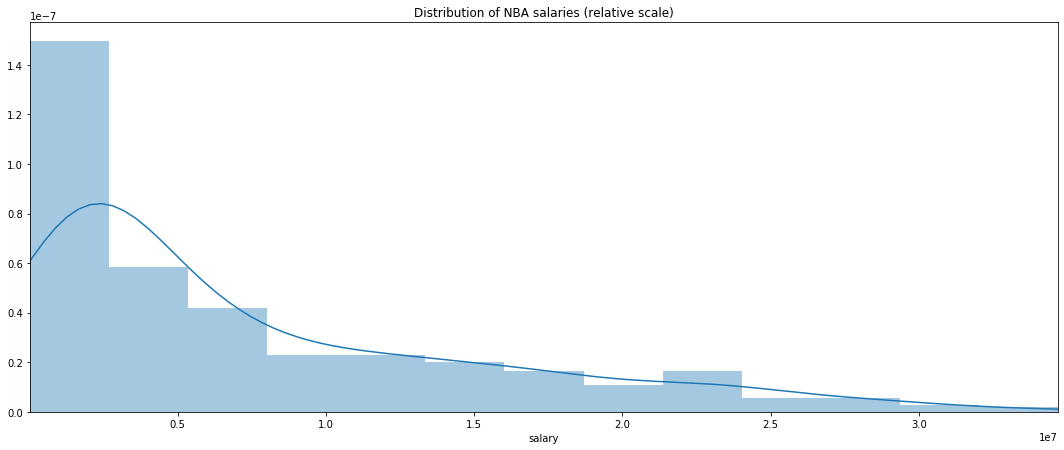

In [455]:
plt.figure(figsize=(15,6))

plt.subplot(1,1,1)
plt.tight_layout()
sns.distplot(df.salary)
plt.title('Distribution of NBA salaries (relative scale)')
plt.xlim(df.salary.min(),df.salary.max())

plt.show()

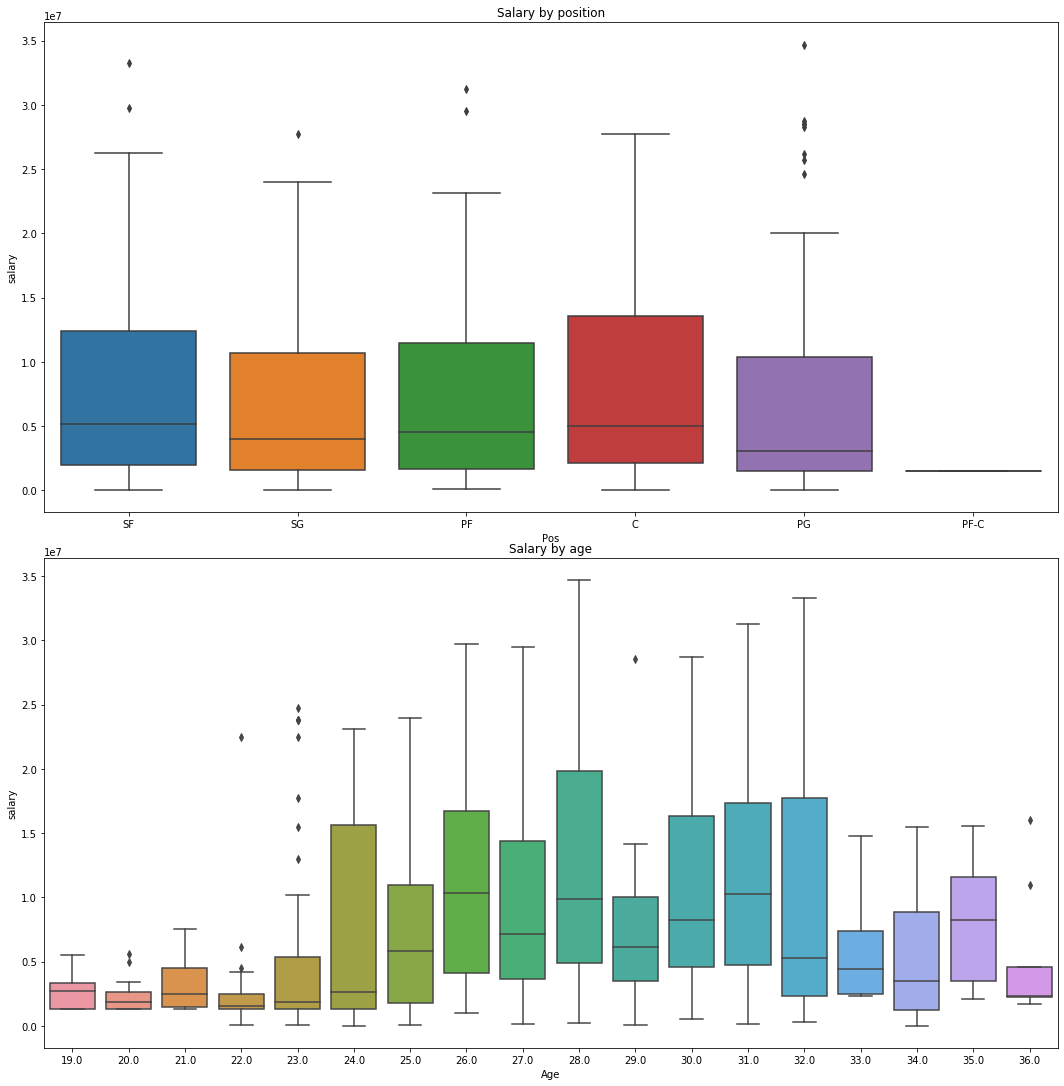

In [519]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
plt.tight_layout()
sns.boxplot(x=df.Pos,y=df.salary)
plt.title('Salary by position')

plt.subplot(2,1,2)
plt.tight_layout()
sns.boxplot(x=df.Age,y=df.salary)
plt.xlim(-0.5,17.5)
plt.title('Salary by age')

plt.show()

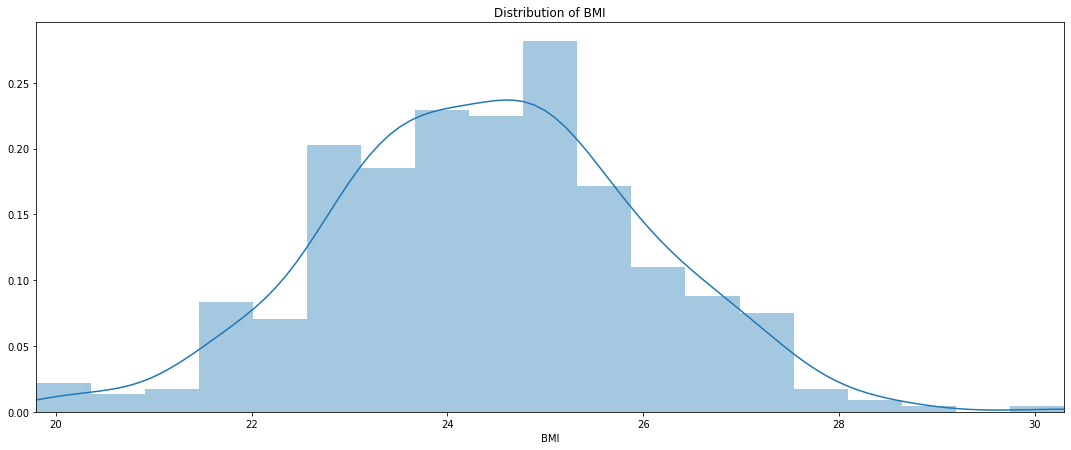

In [523]:
plt.figure(figsize=(15,6))

plt.subplot(1,1,1)
plt.tight_layout()
sns.distplot(df.BMI)
plt.title('Distribution of BMI')
plt.xlim(df.BMI.min(),df.BMI.max())

plt.show()

In [123]:
pos_ht = df[['Pos','height']].groupby(['Pos'],as_index=False)

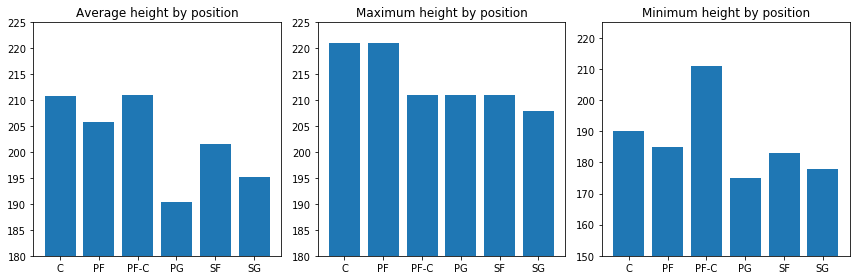

In [187]:
plt.figure(figsize=(12,4))

plt.tight_layout()
plt.subplot(1,3,1)
plt.bar(pos_ht.mean().iloc[:,0],pos_ht.mean().iloc[:,1])
plt.ylim(180,225)
plt.title('Average height by position')

plt.tight_layout()
plt.subplot(1,3,2)
plt.bar(pos_ht.max().iloc[:,0],pos_ht.max().iloc[:,1])
plt.ylim(180,225)
plt.title('Maximum height by position')

plt.tight_layout()
plt.subplot(1,3,3)
plt.bar(pos_ht.min().iloc[:,0],pos_ht.min().iloc[:,1])
plt.ylim(150,225)
plt.title('Minimum height by position')

plt.show()

In [176]:
pos_rpg = df[['Pos','rpg']].groupby('Pos',as_index=False)

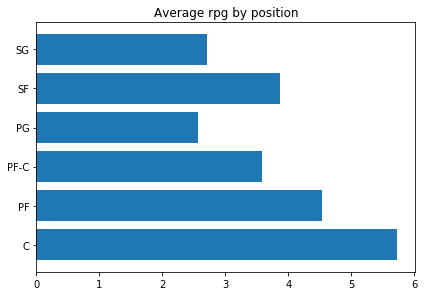

In [182]:
plt.barh(pos_rpg.mean().iloc[:,0],pos_rpg.mean().iloc[:,1])
plt.tight_layout()
plt.title('Average rpg by position')
plt.show()

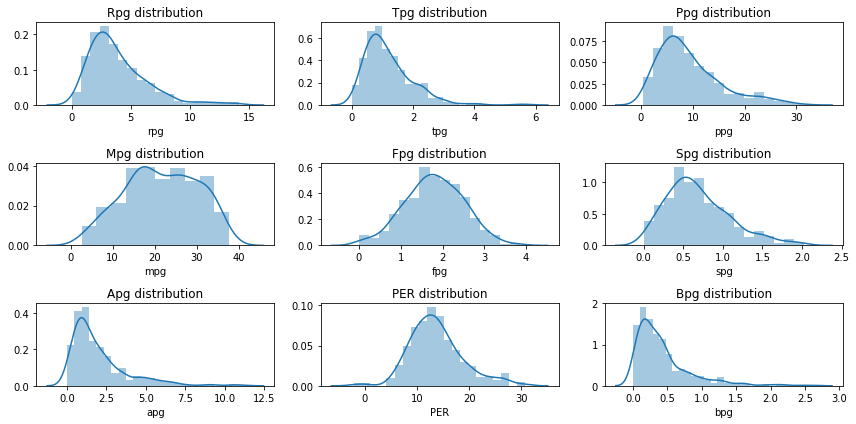

In [204]:
plt.figure(figsize=(12,6))

plt.tight_layout()
plt.subplot(3,3,1)
sns.distplot(df.rpg)
plt.title('Rpg distribution')

plt.tight_layout()
plt.subplot(3,3,3)
sns.distplot(df.ppg)
plt.title('Ppg distribution')

plt.tight_layout()
plt.subplot(3,3,6)
sns.distplot(df.spg)
plt.title('Spg distribution')

plt.tight_layout()
plt.subplot(3,3,7)
sns.distplot(df.apg)
plt.title('Apg distribution')

plt.tight_layout()
plt.subplot(3,3,9)
sns.distplot(df.bpg)
plt.title('Bpg distribution')

plt.tight_layout()
plt.subplot(3,3,4)
sns.distplot(df.mpg)
plt.title('Mpg distribution')

plt.tight_layout()
plt.subplot(3,3,5)
sns.distplot(df.fpg)
plt.title('Fpg distribution')

plt.tight_layout()
plt.subplot(3,3,2)
sns.distplot(df['tpg'])
plt.title('Tpg distribution')

plt.tight_layout()
plt.subplot(3,3,8)
sns.distplot(df.PER)
plt.title('PER distribution')

plt.show()

<Figure size 432x288 with 0 Axes>

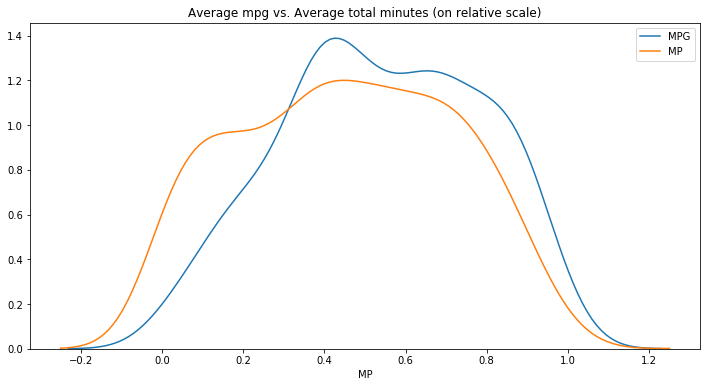

In [225]:
plt.tight_layout()
plt.figure(figsize=(12,6))
sns.distplot((df.mpg-df.mpg.min())/(df.mpg.max()-df.mpg.min()),hist=False,kde=True,label='MPG')
sns.distplot((df.MP-df.MP.min())/(df.MP.max()-df.MP.min()),hist=False,kde=True,label='MP')
plt.title('Average mpg vs. Average total minutes (on relative scale)')
plt.show()

<Figure size 432x288 with 0 Axes>

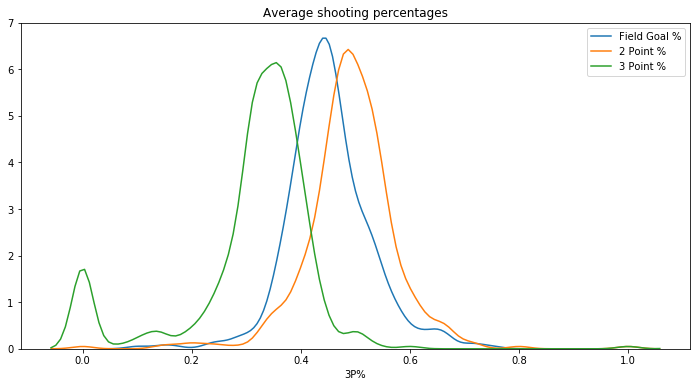

In [224]:
plt.tight_layout()
plt.figure(figsize=(12,6))
sns.distplot(df['FG%'],hist=False,kde=True,label='Field Goal %')
sns.distplot(df['2P%'],hist=False,kde=True,label='2 Point %')
sns.distplot(df['3P%'],hist=False,kde=True,label='3 Point %')
plt.title('Average shooting percentages')
plt.show()

<Figure size 432x288 with 0 Axes>

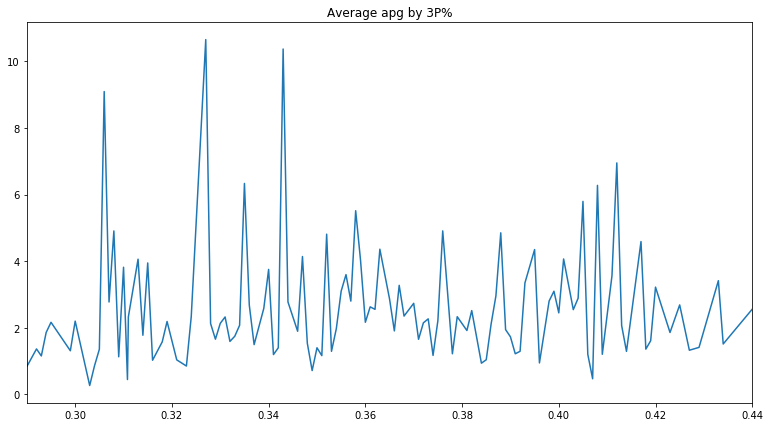

In [281]:
tp_apg = df[['3P%','apg']].groupby('3P%',as_index=True).mean()
plt.tight_layout()
plt.figure(figsize=(13,7))
plt.plot(tp_apg.iloc[40:160])
plt.xlim(0.29,0.44)
plt.title('Average apg by 3P%')
plt.show()

In [298]:
col_list = ['University of Kentucky','Duke University','University of California, Los Angeles','University of Kansas',
           'Syracuse University','University of Arizona','University of Florida','University of North Carolina',
           'Louisiana State University','University of Texas at Austin','Stanford University',
           'Michigan State University','Indiana University']

In [362]:
local_dict_1 = {}
for col in col_list:
    local_dict_1[col] = df[df.college==col].PER.mean()
    local_dict_2 = {}
for col in col_list:
    local_dict_2[col] = df[df.college==col].WS.mean()

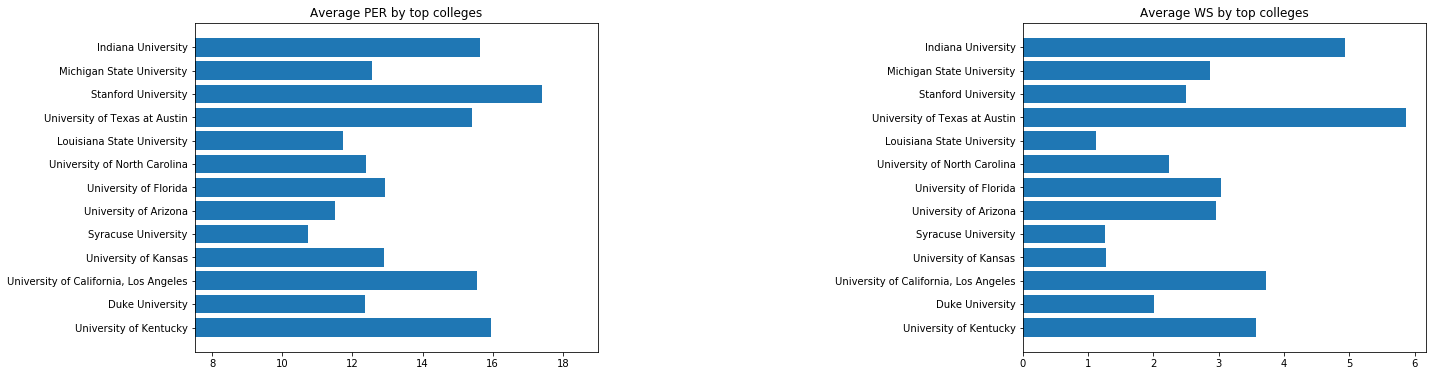

In [376]:
plt.figure(figsize=(20,15))

plt.tight_layout()
plt.subplot(3,3,1)
plt.barh(col_list,local_dict_1.values())
plt.title('Average PER by top colleges')
plt.xlim(7.5,19)

plt.tight_layout()
plt.subplot(3,3,3)
plt.barh(col_list,local_dict_2.values())
plt.title('Average WS by top colleges')

plt.show()

In [379]:
pos_ppg = df[['Pos','ppg']].groupby('Pos',as_index=False)

In [380]:
pos_ppg.mean()

,Pos,ppg
0,C,8.342218
1,PF,8.418288
2,PF-C,5.357143
3,PG,10.154299
4,SF,9.694195
5,SG,10.001430


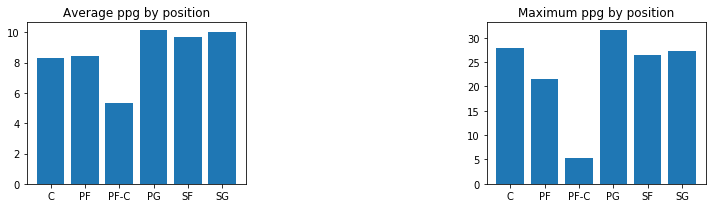

In [392]:
plt.figure(figsize=(10,3))

plt.tight_layout()
plt.subplot(1,3,1)
plt.bar(pos_ppg.mean().iloc[:,0],pos_ppg.mean().iloc[:,1])
plt.title('Average ppg by position')

plt.tight_layout()
plt.subplot(1,3,3)
plt.bar(pos_ppg.max().iloc[:,0],pos_ppg.max().iloc[:,1])
plt.title('Maximum ppg by position')

plt.show()

In [394]:
pos_age = df[['Pos','Age']].groupby('Pos',as_index=False)

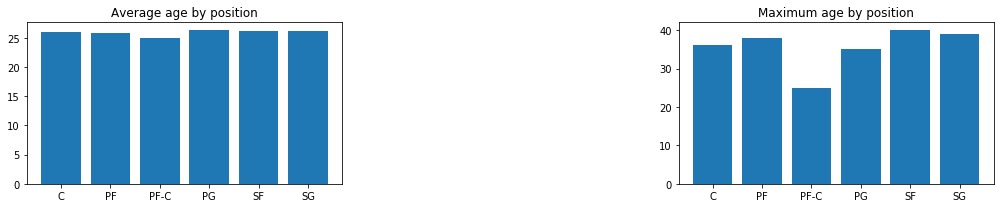

In [429]:
plt.figure(figsize=(14,3))

plt.tight_layout()
plt.subplot(1,3,1)
plt.bar(pos_age.mean().iloc[:,0],pos_age.mean().iloc[:,1])
plt.title('Average age by position')

plt.tight_layout()
plt.subplot(1,3,3)
plt.bar(pos_age.max().iloc[:,0],pos_age.max().iloc[:,1])
plt.title('Maximum age by position')

plt.show()

In [396]:
ppg_age = df[['Age','ppg']].groupby('Age',as_index=False)

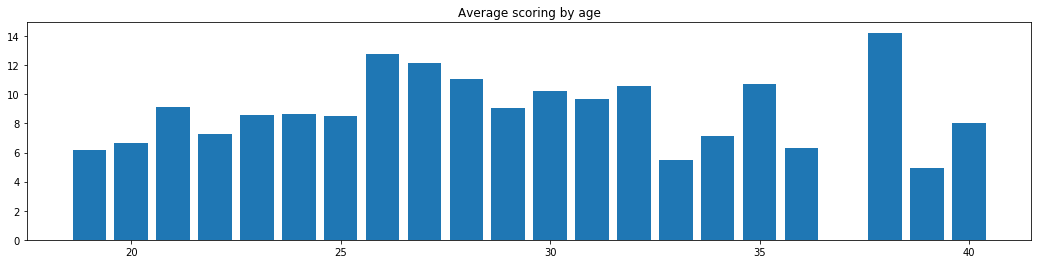

In [428]:
plt.figure(figsize=(18,4))

plt.tight_layout()
plt.subplot(1,1,1)
plt.bar(ppg_age.mean().iloc[:,0],ppg_age.mean().iloc[:,1])
plt.title('Average scoring by age')

plt.show()

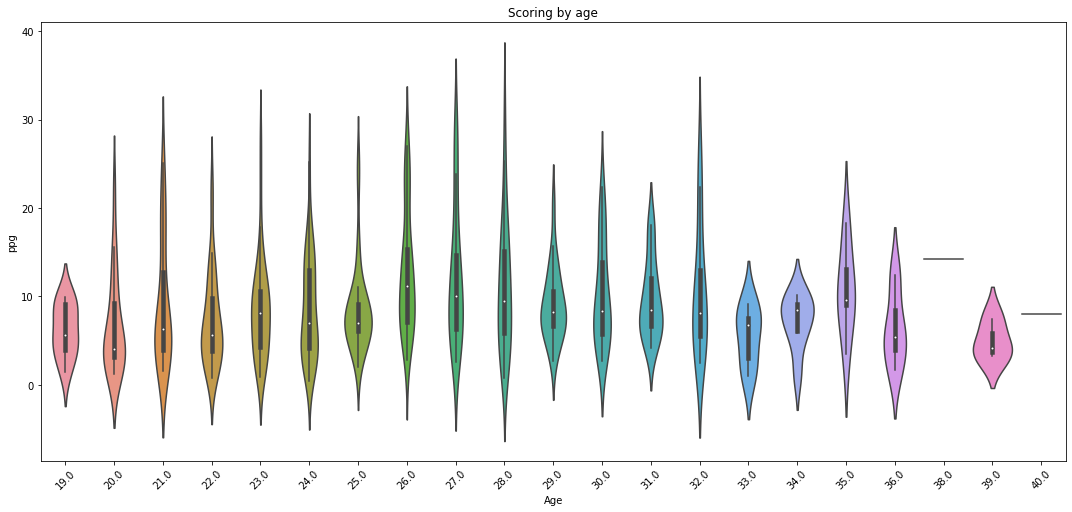

In [427]:
plt.figure(figsize=(15,7))

plt.subplot(1,1,1)
g = sns.violinplot(x=df.Age ,y=df.ppg)
g.set_xticklabels(labels=set(df.Age),rotation=45)
plt.tight_layout()
plt.title('Scoring by age')
plt.show()

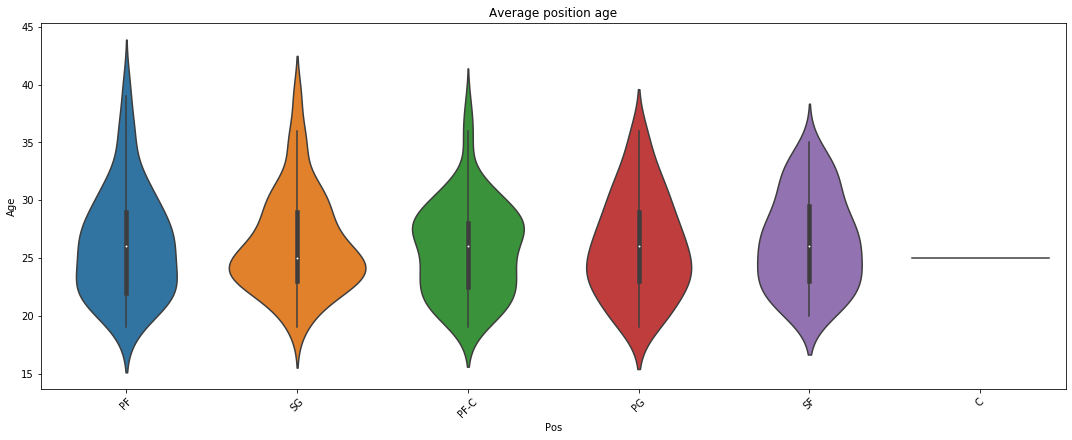

In [426]:
plt.figure(figsize=(15,6))

plt.subplot(1,1,1)
g = sns.violinplot(x=df.Pos ,y=df.Age)
g.set_xticklabels(labels=set(df.Pos),rotation=45)
plt.tight_layout()
plt.title('Average position age')
plt.show()

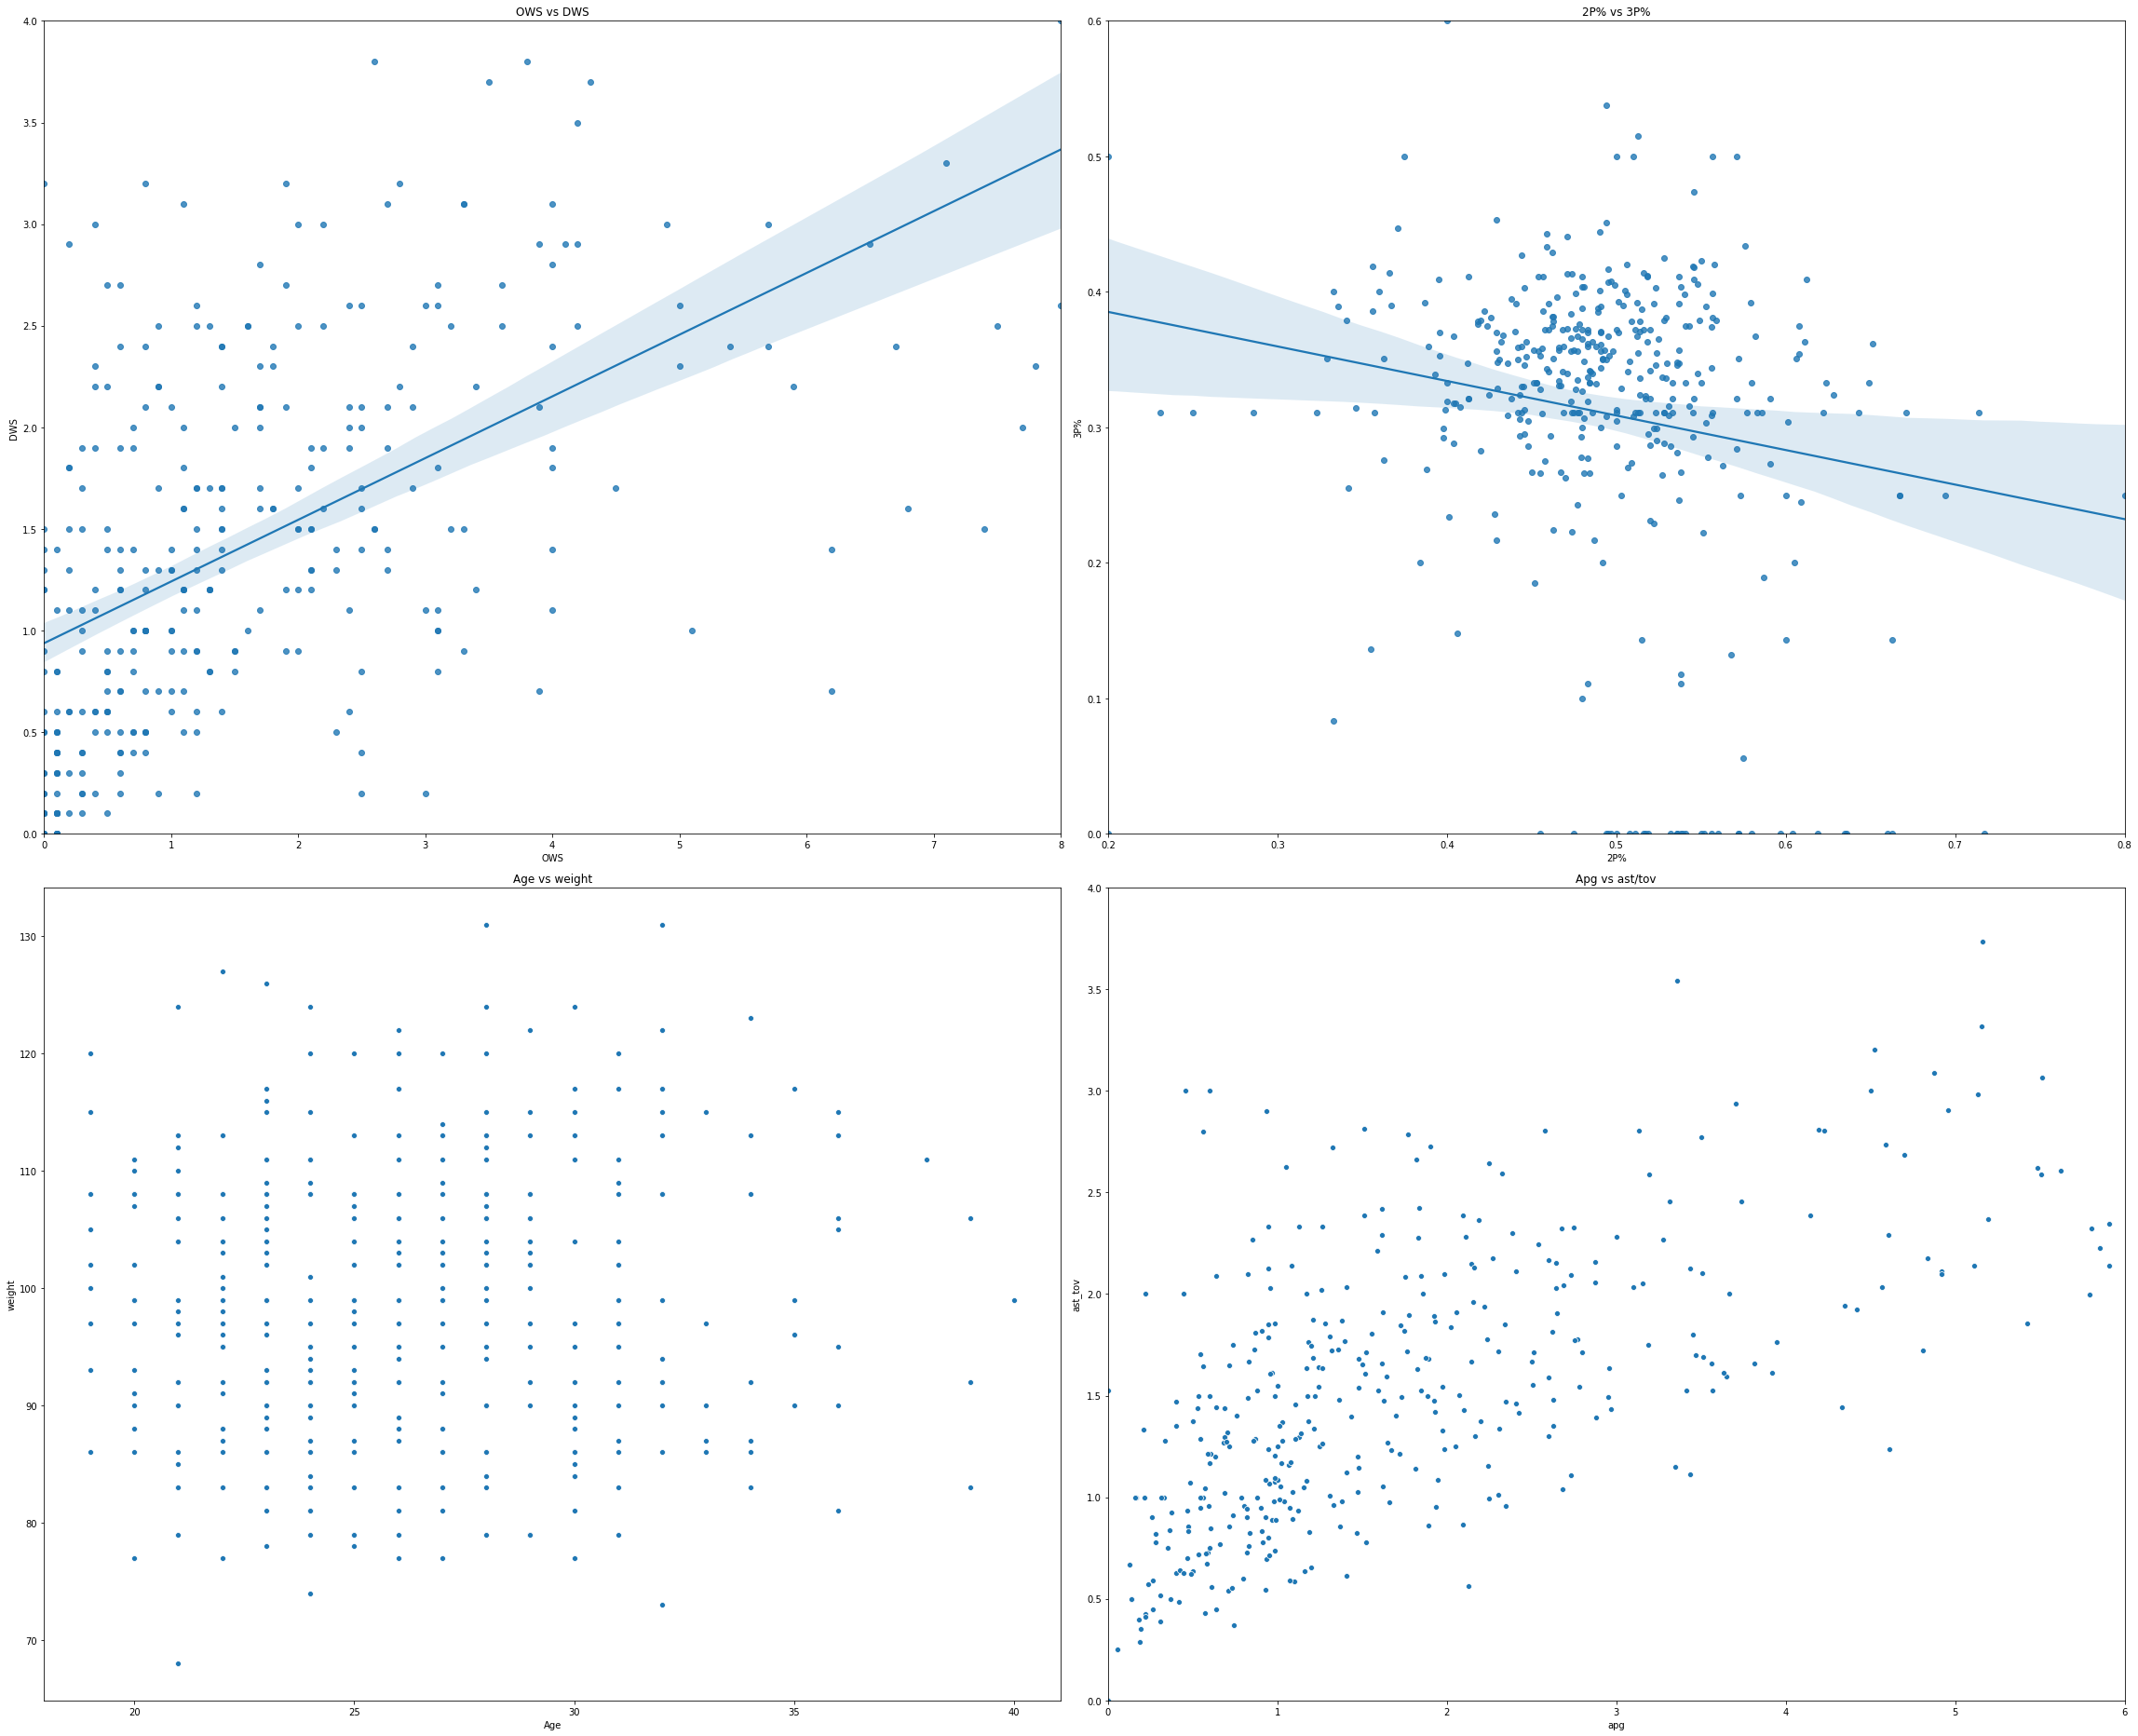

In [542]:
plt.figure(figsize=(32,26))

plt.subplot(2,2,1)
plt.tight_layout()
sns.regplot(df.OWS,df.DWS)
plt.xlim(0,8)
plt.ylim(0,4)
plt.title('OWS vs DWS')

plt.subplot(2,2,2)
plt.tight_layout()
sns.regplot(df['2P%'],df['3P%'])
plt.xlim(0.2,0.8)
plt.ylim(0,0.6)
plt.title('2P% vs 3P%')

plt.subplot(2,2,3)
plt.tight_layout()
sns.scatterplot(df['Age'],df['weight'])
plt.title('Age vs weight')

plt.subplot(2,2,4)
plt.tight_layout()
sns.scatterplot(x=df['apg'],y=df['ast_tov'])
plt.ylim(0,4)
plt.xlim(0,6)
plt.title('Apg vs ast/tov')

plt.show()

### More hypothesis testing

In [ ]:
# Is the average salary of the golden state warriors higher than other teams?
## One sample test here where we use a Z-test 
### warriors mu - league mu / std/(sqrt(n)) = z-stat
#### alpha = 0.05 ==> z-critical 1.645

In [460]:
np.mean([df[df.Tm_y=='GSW'].salary.mean(),df[df.Tm_x=='GSW'].salary.mean()])

9559296.892857144

In [473]:
(9559296.892857144 - df.salary.mean()) / ((df.salary.std())/np.sqrt(len(df)))

5.260490157488599

In [543]:
# Conclusion: we can reject the null hypothesis and say Golden state warriors make more money.

In [544]:
df.columns

Index(['index', 'Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG%',
       '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'PF', 'Tm_y', 'salary',
       'height', 'weight', 'college', 'born', 'birth_city', 'birth_state',
       'BMI', 'Start%', 'ppg', 'apg', 'tpg', 'fpg', 'bpg', 'spg', 'rpg',
       'orpg', 'mpg', 'conf_x', 'conf_y', '3v2', 'Traded', 'FGvTS', 'ast_tov',
       'use_efficiency', 'DvO', 'start_efficiency'],
      dtype='object')

In [545]:
df.Age.median()

26.0

In [546]:
# Question two: Do older players or younger players have better stats:
# First: scoring
# Second: rebounding
# Third: PER

In [554]:
print('younger')
print(f'total: {len(df[df.Age<=26])}')
print(f'scoring: {df[df.Age<=26].ppg.mean()}, {df[df.Age<=26].ppg.std()}')
print(f'rebounding: {df[df.Age<=26].rpg.mean()}, {df[df.Age<=26].rpg.std()}')
print(f'PER: {df[df.Age<=26].PER.mean()}, {df[df.Age<=26].PER.std()}')

younger
total: 235
scoring: 8.775497817609043, 5.9785709259272295
rebounding: 3.6640560845588728, 2.4029463226265344
PER: 13.352340425531917, 5.117819636557463


In [555]:
print('older')
print(f'total: {len(df[df.Age>26])}')
print(f'scoring: {df[df.Age>26].ppg.mean()}, {df[df.Age>26].ppg.std()}')
print(f'rebounding: {df[df.Age>26].rpg.mean()}, {df[df.Age>26].rpg.std()}')
print(f'PER: {df[df.Age>26].PER.mean()}, {df[df.Age>26].PER.std()}')

older
total: 176
scoring: 10.058993367382293, 6.190612502016571
rebounding: 4.146153310783087, 2.515738535067571
PER: 14.247159090909088, 5.062093626466908


In [564]:
rvs_o_score = stats.norm.rvs(loc=10.058993367382293,scale=6.190612502016571,size=150)
rvs_y_score = stats.norm.rvs(loc=8.775497817609043,scale=5.9785709259272295,size=150)
stats.ttest_ind(rvs_o_score,rvs_y_score)

Ttest_indResult(statistic=1.177352578310781, pvalue=0.239994266681544)

In [565]:
rvs_o_reb = stats.norm.rvs(loc=4.146153310783087,scale=2.515738535067571,size=150)
rvs_y_reb = stats.norm.rvs(loc=3.6640560845588728,scale=2.4029463226265344,size=150)
stats.ttest_ind(rvs_o_reb,rvs_y_reb)

Ttest_indResult(statistic=0.05984741399713011, pvalue=0.9523172767607608)

In [566]:
rvs_o_per = stats.norm.rvs(loc=14.247159090909088,scale=5.062093626466908,size=150)
rvs_y_per = stats.norm.rvs(loc=13.352340425531917,scale=5.117819636557463,size=150)
stats.ttest_ind(rvs_o_per,rvs_y_per)

Ttest_indResult(statistic=0.37440086761633257, pvalue=0.7083723716909065)

In [567]:
# Conclusion: age split at the median doesn't matter

In [568]:
# Quick look at PER based on in 30s or younger

In [569]:
print(f'old: {len(df[df.Age>=30])}')
print(f'young: {len(df[df.Age<30])}')
print(f'PER old: {df[df.Age>=30].PER.mean()}, {df[df.Age>=30].PER.std()}')
print(f'PER young: {df[df.Age<30].PER.mean()}, {df[df.Age<30].PER.std()}')

old: 88
young: 323
PER old: 13.58181818181818, 4.297942449579275
PER young: 13.777399380804955, 5.3114563324059745


In [570]:
rvs_30_per = stats.norm.rvs(loc=13.58181818181818,scale=4.297942449579275,size=70)
rvs_29_per = stats.norm.rvs(loc=13.777399380804955,scale=5.3114563324059745,size=70)
stats.ttest_ind(rvs_o_per,rvs_y_per)

Ttest_indResult(statistic=0.37440086761633257, pvalue=0.7083723716909065)

In [571]:
# Conclusion: age split at 30 doesn't matter

In [575]:
# Let's look at a loop:

In [576]:
stats.ttest_ind(rvs_o_per,rvs_y_per)[1]

0.7083723716909065

In [580]:
# Question three: Average height vs average weight on relative scale

In [583]:
print(df.height.mean())
print(df.height.std())
print(df.height.min())
print(df.height.max())
print(df.weight.mean())
print(df.weight.std())
print(df.weight.min())
print(df.weight.max())

200.676399026764
9.140630424775987
175.0
221.0
98.58880778588808
11.737526697111392
68.0
131.0


In [585]:
print((200.676399026764-175.0)/(221-175))
print((98.58880778588808-68.0)/(131-68))

0.5581825875383476
0.485536631522033


In [590]:
0.0027500000000000003 * 9.140630424775987

0.025136733668133966

In [592]:
0.004924865635625755 * 11.737526697111392

0.05780574187784376

In [597]:
r_h = stats.norm.rvs(loc=0.5581825875383476,scale=0.025136733668133966,size=350)
r_w = stats.norm.rvs(loc=0.485536631522033,scale=0.05780574187784376,size=350)

In [598]:
stats.ttest_ind(r_h,r_w)

Ttest_indResult(statistic=21.295691494172925, pvalue=6.380029839692674e-78)

In [599]:
# It's safe to say that on a relative scale height do have a high correlation

### Binning

In [64]:
back_front_df = {'SF':'F','PF':'F','SG':'B','PG':'B','C':'F','PF-C':'F'}

In [65]:
df['FB'] = df.Pos
df['FB'] = df.FB.map(lambda x: back_front_df[x])

In [66]:
df.columns

Index(['index', 'Player', 'Pos', 'Age', 'Tm_x', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG%',
       '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'PF', 'Tm_y', 'salary',
       'height', 'weight', 'college', 'born', 'birth_city', 'birth_state',
       'BMI', 'Start%', 'ppg', 'apg', 'tpg', 'fpg', 'bpg', 'spg', 'rpg',
       'orpg', 'mpg', 'conf_x', 'conf_y', '3v2', 'Traded', 'FGvTS', 'ast_tov',
       'use_efficiency', 'DvO', 'start_efficiency', 'FB'],
      dtype='object')

In [67]:
pd.qcut(df['MP'],q=5)

0       (557.0, 1158.0]
1      (1642.0, 2164.0]
2      (1158.0, 1642.0]
3      (1642.0, 2164.0]
4      (1158.0, 1642.0]
             ...       
406    (1642.0, 2164.0]
407      (8.999, 557.0]
408      (8.999, 557.0]
409     (557.0, 1158.0]
410     (557.0, 1158.0]
Name: MP, Length: 411, dtype: category
Categories (5, interval[float64]): [(8.999, 557.0] < (557.0, 1158.0] < (1158.0, 1642.0] < (1642.0, 2164.0] < (2164.0, 3048.0]]

In [68]:
df['3P%']=pd.qcut(df['3P%'],q=5)
df['FT%']=pd.qcut(df['FT%'],q=5)
df['2P%']=pd.qcut(df['2P%'],q=5)
df['TS%']=pd.qcut(df['TS%'],q=4)
df['FG%']=pd.qcut(df['FG%'],q=5)
df['eFG%']=pd.qcut(df['eFG%'],q=5)
df['Age']=pd.qcut(df['Age'],q=5)
df['MP']=pd.qcut(df['MP'],q=5)

In [69]:
df.head()

,index,Player,Pos,Age,Tm_x,G,GS,MP,PER,TS%,...,conf_x,conf_y,3v2,Traded,FGvTS,ast_tov,use_efficiency,DvO,start_efficiency,FB
0,29,Mike Dunleavy,SF,"(30.0, 40.0]",TOT,53.0,2.0,"(557.0, 1158.0]",10.1,"(0.542, 0.578]",...,T,E,0.851613,False,0.738220,1.785714,1.386139,1.142857,26.500000,F
1,60,Gerald Henderson,SG,"(27.0, 30.0]",PHI,72.0,41.0,"(1642.0, 2164.0]",10.8,"(0.51, 0.542]",...,E,E,0.775824,True,0.799622,1.806452,1.657407,1.000000,1.756098,B
2,88,Larry Nance,PF,"(22.0, 24.0]",LAL,63.0,7.0,"(1158.0, 1642.0]",15.8,"(0.542, 0.578]",...,W,E,0.501805,False,0.927690,1.714286,0.848101,1.400000,9.000000,F
3,112,Tim Hardaway,SG,"(22.0, 24.0]",ATL,79.0,30.0,"(1642.0, 2164.0]",15.2,"(0.542, 0.578]",...,E,E,0.664804,False,0.801056,1.716981,1.480263,1.285714,2.633333,B
4,128,Glenn Robinson,SF,"(22.0, 24.0]",IND,69.0,27.0,"(1158.0, 1642.0]",11.5,"(0.542, 0.578]",...,E,E,0.765625,True,0.828014,1.270270,1.113043,1.083333,2.555556,F


### Remove correlation

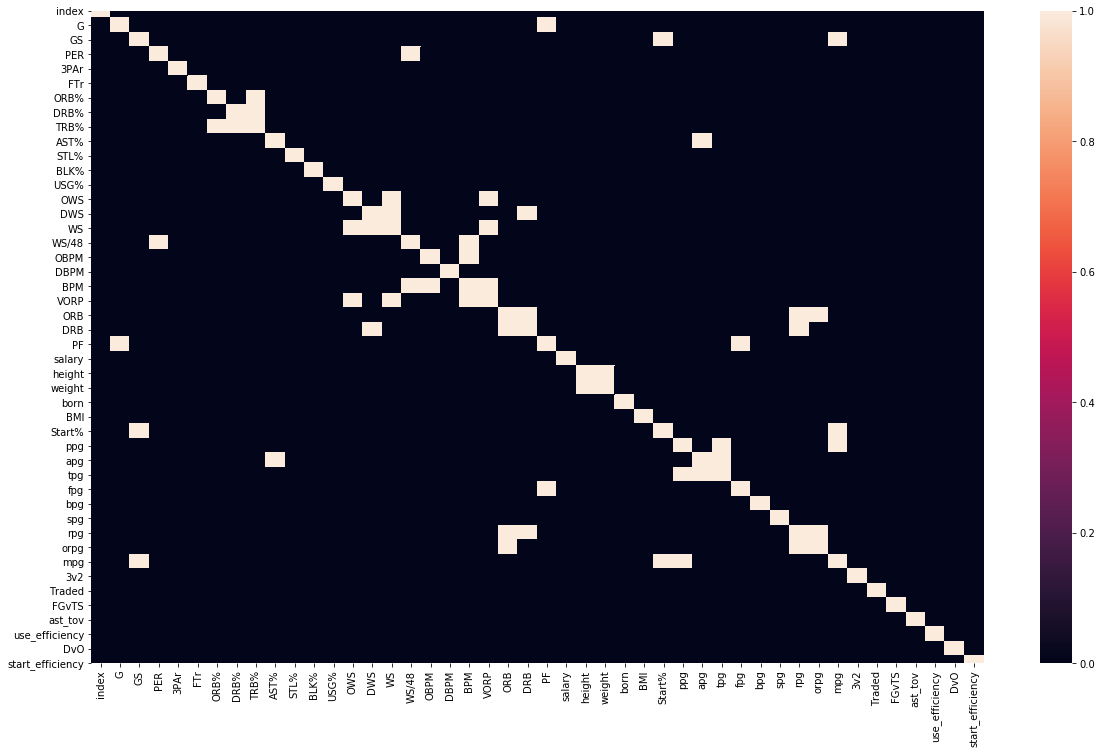

In [70]:
plt.figure(figsize=(20,12))
plt.tight_layout()
sns.heatmap(df.corr()>=0.8)
plt.show()

In [71]:
df.drop(['MP','orpg','TRB%','apg','DRB','WS','DWS','GS','BPM','fpg','3P%','tpg','FG%','TS%',
        'G','height','ORB','OWS','mpg','WS/48','apg','DRB'],axis=1,inplace=True)

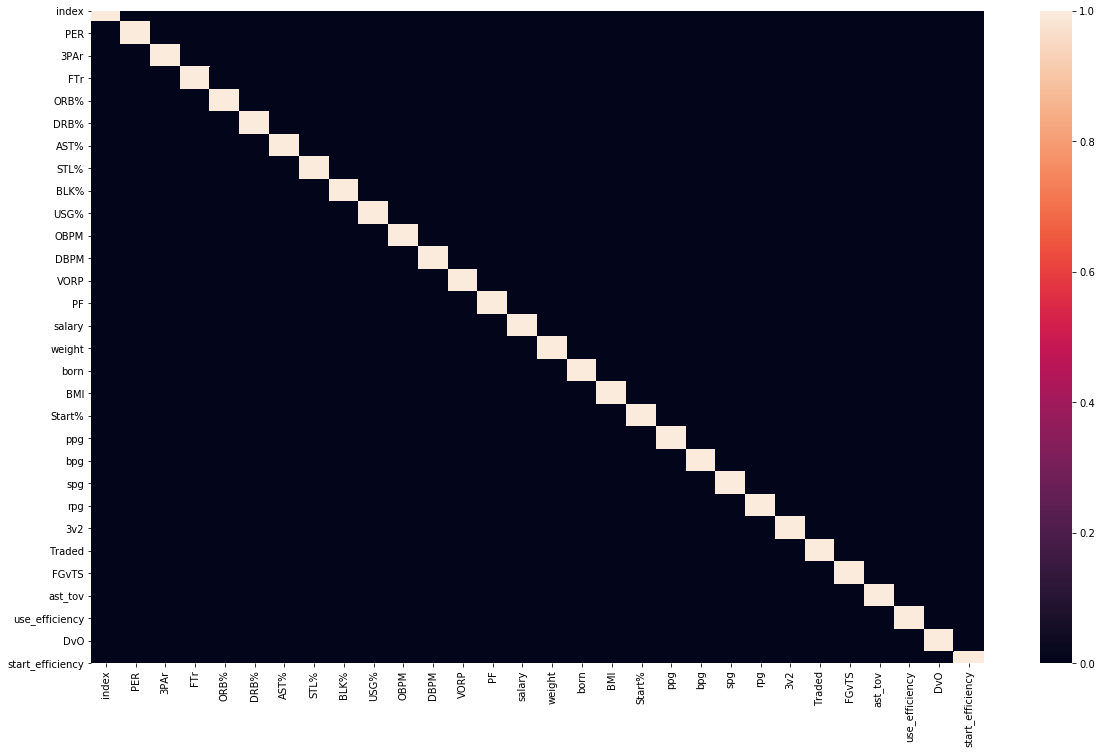

In [72]:
plt.figure(figsize=(20,12))
plt.tight_layout()
sns.heatmap(df.corr()>=0.8)
plt.show()

In [73]:
print(df.shape)
df.head()

(411, 44)


,index,Player,Pos,Age,Tm_x,PER,3PAr,FTr,ORB%,DRB%,...,conf_x,conf_y,3v2,Traded,FGvTS,ast_tov,use_efficiency,DvO,start_efficiency,FB
0,29,Mike Dunleavy,SF,"(30.0, 40.0]",TOT,10.1,0.609,0.205,2.4,12.4,...,T,E,0.851613,False,0.738220,1.785714,1.386139,1.142857,26.500000,F
1,60,Gerald Henderson,SG,"(27.0, 30.0]",PHI,10.8,0.313,0.298,2.2,10.0,...,E,E,0.775824,True,0.799622,1.806452,1.657407,1.000000,1.756098,B
2,88,Larry Nance,PF,"(22.0, 24.0]",LAL,15.8,0.100,0.222,8.8,19.6,...,W,E,0.501805,False,0.927690,1.714286,0.848101,1.400000,9.000000,F
3,112,Tim Hardaway,SG,"(22.0, 24.0]",ATL,15.2,0.457,0.235,1.8,9.5,...,E,E,0.664804,False,0.801056,1.716981,1.480263,1.285714,2.633333,B
4,128,Glenn Robinson,SF,"(22.0, 24.0]",IND,11.5,0.370,0.225,4.5,14.6,...,E,E,0.765625,True,0.828014,1.270270,1.113043,1.083333,2.555556,F


### Encode categorical data

In [74]:
college_sal_df = df[['college','salary']].groupby(['college'],as_index=False).mean()

In [75]:
college_sal_dict = {}
for i in range(len(college_sal_df)):
    college_sal_dict[college_sal_df.iloc[i,0]]=float(college_sal_df.iloc[i,1])

In [76]:
df.college = df.college.map(lambda x: college_sal_dict[x])

In [77]:
print(df.shape)
df.head()

(411, 44)


,index,Player,Pos,Age,Tm_x,PER,3PAr,FTr,ORB%,DRB%,...,conf_x,conf_y,3v2,Traded,FGvTS,ast_tov,use_efficiency,DvO,start_efficiency,FB
0,29,Mike Dunleavy,SF,"(30.0, 40.0]",TOT,10.1,0.609,0.205,2.4,12.4,...,T,E,0.851613,False,0.738220,1.785714,1.386139,1.142857,26.500000,F
1,60,Gerald Henderson,SG,"(27.0, 30.0]",PHI,10.8,0.313,0.298,2.2,10.0,...,E,E,0.775824,True,0.799622,1.806452,1.657407,1.000000,1.756098,B
2,88,Larry Nance,PF,"(22.0, 24.0]",LAL,15.8,0.100,0.222,8.8,19.6,...,W,E,0.501805,False,0.927690,1.714286,0.848101,1.400000,9.000000,F
3,112,Tim Hardaway,SG,"(22.0, 24.0]",ATL,15.2,0.457,0.235,1.8,9.5,...,E,E,0.664804,False,0.801056,1.716981,1.480263,1.285714,2.633333,B
4,128,Glenn Robinson,SF,"(22.0, 24.0]",IND,11.5,0.370,0.225,4.5,14.6,...,E,E,0.765625,True,0.828014,1.270270,1.113043,1.083333,2.555556,F


In [78]:
tf_dict = {True:1,False:0}
df.Traded=df.Traded.map(lambda x: tf_dict[x])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 44 columns):
index               411 non-null int64
Player              411 non-null object
Pos                 411 non-null object
Age                 411 non-null category
Tm_x                411 non-null object
PER                 411 non-null float64
3PAr                411 non-null float64
FTr                 411 non-null float64
ORB%                411 non-null float64
DRB%                411 non-null float64
AST%                411 non-null float64
STL%                411 non-null float64
BLK%                411 non-null float64
USG%                411 non-null float64
OBPM                411 non-null float64
DBPM                411 non-null float64
VORP                411 non-null float64
2P%                 411 non-null category
eFG%                411 non-null category
FT%                 411 non-null category
PF                  411 non-null float64
Tm_y                411 non-null ob

In [80]:
cat_list = ['conf_x','conf_y','birth_state','birth_city','Tm_y','Tm_x','Pos','FT%','eFG%','2P%','Age','FB']

#### *the super-code*

In [81]:
for cat in cat_list:
    dummy_df = df[[cat,'salary']].groupby([cat],as_index=False).mean()
    dummy_dict = {}
    for i in range(len(dummy_df)):
        dummy_dict[dummy_df.iloc[i,0]]=float(dummy_df.iloc[i,1])
    df[cat] = df[cat].map(lambda x: dummy_dict[x])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 44 columns):
index               411 non-null int64
Player              411 non-null object
Pos                 411 non-null float64
Age                 411 non-null category
Tm_x                411 non-null float64
PER                 411 non-null float64
3PAr                411 non-null float64
FTr                 411 non-null float64
ORB%                411 non-null float64
DRB%                411 non-null float64
AST%                411 non-null float64
STL%                411 non-null float64
BLK%                411 non-null float64
USG%                411 non-null float64
OBPM                411 non-null float64
DBPM                411 non-null float64
VORP                411 non-null float64
2P%                 411 non-null category
eFG%                411 non-null category
FT%                 411 non-null category
PF                  411 non-null float64
Tm_y                411 non-null 

In [83]:
print(df.shape)
df.head()

(411, 44)


,index,Player,Pos,Age,Tm_x,PER,3PAr,FTr,ORB%,DRB%,...,conf_x,conf_y,3v2,Traded,FGvTS,ast_tov,use_efficiency,DvO,start_efficiency,FB
0,29,Mike Dunleavy,8.150764e+06,8.569375e+06,4.534396e+06,10.1,0.609,0.205,2.4,12.4,...,4.534396e+06,7.259103e+06,0.851613,0,0.738220,1.785714,1.386139,1.142857,26.500000,7.895591e+06
1,60,Gerald Henderson,6.910359e+06,1.051933e+07,4.466475e+06,10.8,0.313,0.298,2.2,10.0,...,7.819094e+06,7.259103e+06,0.775824,1,0.799622,1.806452,1.657407,1.000000,1.756098,7.116839e+06
2,88,Larry Nance,7.302966e+06,6.793130e+06,6.531101e+06,15.8,0.100,0.222,8.8,19.6,...,8.095873e+06,7.259103e+06,0.501805,0,0.927690,1.714286,0.848101,1.400000,9.000000,7.895591e+06
3,112,Tim Hardaway,6.910359e+06,6.793130e+06,1.110260e+07,15.2,0.457,0.235,1.8,9.5,...,7.819094e+06,7.259103e+06,0.664804,0,0.801056,1.716981,1.480263,1.285714,2.633333,7.116839e+06
4,128,Glenn Robinson,8.150764e+06,6.793130e+06,6.767679e+06,11.5,0.370,0.225,4.5,14.6,...,7.819094e+06,7.259103e+06,0.765625,1,0.828014,1.270270,1.113043,1.083333,2.555556,7.895591e+06


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 44 columns):
index               411 non-null int64
Player              411 non-null object
Pos                 411 non-null float64
Age                 411 non-null category
Tm_x                411 non-null float64
PER                 411 non-null float64
3PAr                411 non-null float64
FTr                 411 non-null float64
ORB%                411 non-null float64
DRB%                411 non-null float64
AST%                411 non-null float64
STL%                411 non-null float64
BLK%                411 non-null float64
USG%                411 non-null float64
OBPM                411 non-null float64
DBPM                411 non-null float64
VORP                411 non-null float64
2P%                 411 non-null category
eFG%                411 non-null category
FT%                 411 non-null category
PF                  411 non-null float64
Tm_y                411 non-null 

In [85]:
df['Target'] = df.salary
df.drop(['Player','salary'],axis=1,inplace=True)

In [86]:
df = df.reset_index()

In [87]:
df.head()

,level_0,index,Pos,Age,Tm_x,PER,3PAr,FTr,ORB%,DRB%,...,conf_y,3v2,Traded,FGvTS,ast_tov,use_efficiency,DvO,start_efficiency,FB,Target
0,0,29,8.150764e+06,8.569375e+06,4.534396e+06,10.1,0.609,0.205,2.4,12.4,...,7.259103e+06,0.851613,0,0.738220,1.785714,1.386139,1.142857,26.500000,7.895591e+06,1662500.0
1,1,60,6.910359e+06,1.051933e+07,4.466475e+06,10.8,0.313,0.298,2.2,10.0,...,7.259103e+06,0.775824,1,0.799622,1.806452,1.657407,1.000000,1.756098,7.116839e+06,1000000.0
2,2,88,7.302966e+06,6.793130e+06,6.531101e+06,15.8,0.100,0.222,8.8,19.6,...,7.259103e+06,0.501805,0,0.927690,1.714286,0.848101,1.400000,9.000000,7.895591e+06,1471382.0
3,3,112,6.910359e+06,6.793130e+06,1.110260e+07,15.2,0.457,0.235,1.8,9.5,...,7.259103e+06,0.664804,0,0.801056,1.716981,1.480263,1.285714,2.633333,7.116839e+06,16500000.0
4,4,128,8.150764e+06,6.793130e+06,6.767679e+06,11.5,0.370,0.225,4.5,14.6,...,7.259103e+06,0.765625,1,0.828014,1.270270,1.113043,1.083333,2.555556,7.895591e+06,1524305.0


In [88]:
df.drop(['level_0','index'],axis=1,inplace=True)

In [89]:
df.shape

(411, 42)

In [90]:
df.describe().iloc[:,21:]

,BMI,Start%,ppg,bpg,spg,rpg,conf_x,conf_y,3v2,Traded,FGvTS,ast_tov,use_efficiency,DvO,start_efficiency,FB,Target
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,4.110000e+02,4.110000e+02,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,4.110000e+02,4.110000e+02
mean,24.411922,0.434335,9.325121,0.425143,0.686948,3.870502,7.575374e+06,7.575374e+06,0.896068,0.581509,0.835520,2.543607,1.738688,2.575149,24.037136,7.575374e+06,7.575374e+06
std,1.605761,0.402695,6.096052,0.412050,0.405063,2.460470,1.088731e+06,3.268363e+05,4.908676,0.493913,0.084886,9.703110,4.980589,11.965364,37.421954,3.836521e+05,7.645738e+06
min,19.800000,0.000000,0.444444,0.000000,0.000000,0.000000,4.534396e+06,7.259103e+06,0.000000,0.000000,0.465798,0.000000,0.000000,0.000000,1.000000,7.116839e+06,2.500000e+04
25%,23.400000,0.039737,5.111455,0.153846,0.412917,2.142025,7.819094e+06,7.259103e+06,0.560873,0.000000,0.777206,1.004762,1.146248,0.183502,1.069366,7.116839e+06,1.605960e+06
50%,24.500000,0.301370,7.784615,0.313433,0.617647,3.266667,7.819094e+06,7.259103e+06,0.702306,1.000000,0.823423,1.523077,1.375635,0.809524,3.318182,7.895591e+06,4.187599e+06
75%,25.500000,0.935133,12.631291,0.512989,0.912662,5.067835,8.095873e+06,7.912307e+06,0.791894,1.000000,0.897664,2.054412,1.624253,1.563859,25.166667,7.895591e+06,1.191250e+07
max,30.300000,1.000000,31.580247,2.641975,2.026316,14.129870,8.095873e+06,7.912307e+06,100.000000,1.000000,1.072961,100.000000,100.000000,100.000000,100.000000,7.895591e+06,3.468255e+07


In [91]:
df.head()

,Pos,Age,Tm_x,PER,3PAr,FTr,ORB%,DRB%,AST%,STL%,...,conf_y,3v2,Traded,FGvTS,ast_tov,use_efficiency,DvO,start_efficiency,FB,Target
0,8.150764e+06,8.569375e+06,4.534396e+06,10.1,0.609,0.205,2.4,12.4,8.6,0.9,...,7.259103e+06,0.851613,0,0.738220,1.785714,1.386139,1.142857,26.500000,7.895591e+06,1662500.0
1,6.910359e+06,1.051933e+07,4.466475e+06,10.8,0.313,0.298,2.2,10.0,10.5,1.2,...,7.259103e+06,0.775824,1,0.799622,1.806452,1.657407,1.000000,1.756098,7.116839e+06,1000000.0
2,7.302966e+06,6.793130e+06,6.531101e+06,15.8,0.100,0.222,8.8,19.6,9.7,2.8,...,7.259103e+06,0.501805,0,0.927690,1.714286,0.848101,1.400000,9.000000,7.895591e+06,1471382.0
3,6.910359e+06,6.793130e+06,1.110260e+07,15.2,0.457,0.235,1.8,9.5,14.3,1.3,...,7.259103e+06,0.664804,0,0.801056,1.716981,1.480263,1.285714,2.633333,7.116839e+06,16500000.0
4,8.150764e+06,6.793130e+06,6.767679e+06,11.5,0.370,0.225,4.5,14.6,4.7,1.4,...,7.259103e+06,0.765625,1,0.828014,1.270270,1.113043,1.083333,2.555556,7.895591e+06,1524305.0


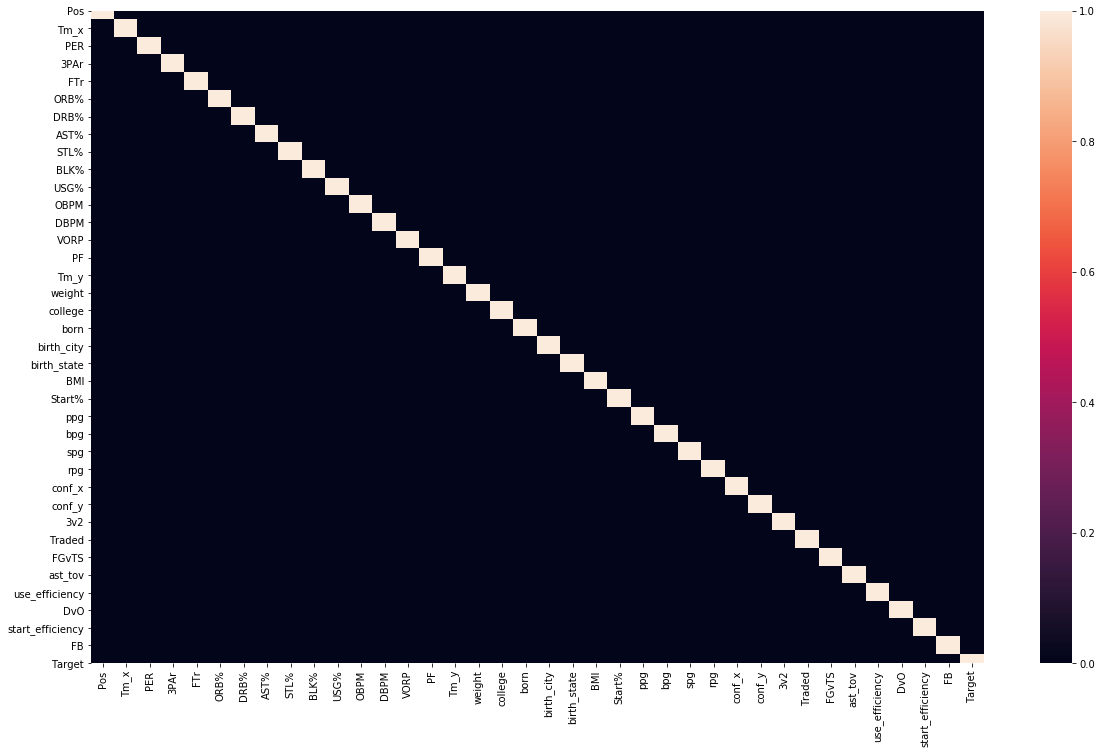

In [92]:
plt.figure(figsize=(20,12))
plt.tight_layout()
sns.heatmap(df.corr()>=0.85)
plt.show()

## Model and check feature importance

In [93]:
## this code is designed to find the number of features needed in the X data for an optimal accuracy score

def optimize_score_rfe(dataframe,method,style,target_variable,ts,cross_val=5,goal='accuracy'):
    
    """
    Input a goal, method, style (the method of analysis written as a string), and number of cross validations and 
    receive an optimal score, number of features used, and list of features used as an output
    """
    
    # Imports and initializing variables
    from sklearn.preprocessing import MinMaxScaler, train_test_split
    from sklearn.feature_selection import RFE
    mms = MinMaxScaler()
    old_score = 0
    old_features_used = 1

    # Optimize features needed
    for i in range(1,df.shape[1]):
        y = dataframe.Target
        X = dataframe.drop('Target',axis=1)
        selector = RFE(method,n_features_to_select=i)
        # selector = RFECV(estimator=method, step=1, cv=StratifiedKFold(cross_val), scoring=goal,min_features_to_select=i)
        selector = selector.fit(X, y.values.ravel())
        selected_columns = X.columns[selector.support_]
        new_y = dataframe.Target
        new_X = dataframe[selected_columns]
        for col in new_X.columns:
            new_X[col] = mms.fit_transform(new_X[[col]])
        X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,test_size=ts,random_state=14) 
        method.fit(X_train,y_train)
        Y_pred = method.predict(X_test)
        if style == 'Linear_Regression':
            accuracy = r2_score(y_test, Y_pred)
        else:
            accuracy = accuracy_score(y_test, Y_pred)
        new_score = accuracy
        if new_score > old_score:
            score = new_score
            features_used = i
            old_score = new_score
            old_features_used = i
        else:
            score = old_score
            features_used = old_features_used
    
        # crate new data frame based on work
        # selector_new = RFECV(estimator=method, step=1, cv=StratifiedKFold(cross_val), scoring='accuracy',min_features_to_select=features_used)
        selector_new = RFE(method,n_features_to_select=features_used)
        selector_new = selector_new.fit(X, y.values.ravel())
        selected_columns_new = X.columns[selector_new.support_]
        
    # print discoveries
    print(f'Predicting: {target_variable}')
    print('')
    print(f'The optimal score is {100*round(score,2)}%, and it makes use of {features_used} features from the data.')
    print('')
    print(f'Those features are: {list(selected_columns_new)}')

In [94]:
optimize_score_rfe(df,LinearRegression(),'Linear_Regression','NBA Player Salary',0.25)

Predicting: NBA Player Salary

The optimal score is 78.0%, and it makes use of 36 features from the data.

Those features are: ['Pos', 'Age', 'Tm_x', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'USG%', 'OBPM', 'DBPM', 'VORP', 'FT%', 'PF', 'weight', 'college', 'born', 'birth_city', 'BMI', 'Start%', 'ppg', 'bpg', 'spg', 'rpg', 'conf_x', '3v2', 'Traded', 'FGvTS', 'ast_tov', 'use_efficiency', 'DvO', 'start_efficiency', 'FB']


In [95]:
y = df.Target
X = df.drop('Target',axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=14,test_size=0.25)

In [97]:
lr = LinearRegression()
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)
r2_score(y_test,Y_pred)

0.5103430207794337

In [98]:
X_new = df[['Pos', 'Age', 'Tm_x', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'USG%', 'OBPM', 'DBPM', 'VORP', 'FT%', 'PF', 'weight', 'college', 'born', 'birth_city', 'BMI', 'Start%', 'ppg', 'bpg', 'spg', 'rpg', 'conf_x', '3v2', 'Traded', 'FGvTS', 'ast_tov', 'use_efficiency', 'DvO', 'start_efficiency', 'FB']]
y_new = df.Target

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,random_state=14,test_size=0.25)

In [100]:
lr = LinearRegression()
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)
r2_score(y_test,Y_pred)

0.7782295015138005

## Summarize findings

In [101]:
feature_importance = pd.DataFrame(lr.coef_).T
feature_importance.columns = X_new.columns

In [102]:
sorted_fi = feature_importance.T.sort_values(by=0,ascending=False)
sorted_fi

,0
FGvTS,9.428831e+06
FTr,2.469731e+06
Start%,1.623391e+06
3PAr,1.012420e+06
STL%,9.657247e+05
VORP,6.665133e+05
ppg,5.394216e+05
Traded,4.992469e+05
bpg,4.432488e+05
rpg,2.811286e+05


## Polynomial model code

In [103]:
def create_polynomial_regression_model(degree,X,y,ts):
    
    "Creates a polynomial regression model for the given degree"
  
    poly_features = PolynomialFeatures(degree=degree)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=14,test_size=ts)
  
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)
  
    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)
  
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
  
    print("\n")
  
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))